# FX Leverage Carry-Trade

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import carry_trade as ct
import datetime as dt

from date_function_v2 import holiday_adjust

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )
font = {'family' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

## 1. Load data

In [2]:
data_path_new = 'Data/to_send.csv'
final_data_new = pd.read_csv(data_path_new)

In [3]:
final_data_new = final_data_new.set_index('Date')
final_data_new.index = pd.to_datetime(final_data_new.index)

In [4]:
#final_data_new.iloc[324:]

## 2. Implement Strategy 

In [5]:
# if you want to test single currency or single trading period, just modify the following list
fx_list = ['USD', 'AUD', 'GBP']
period_list = [7, 30, 60]

In [6]:
# idx, row_row = next(final_data.iterrows())
# ct.find_max_signal(row_row, period_list, fx_list)

In [7]:
results_07 = ct.algo_loop(final_data_new, fx_list, period_list, leverage = 2.0)
results_09 = ct.algo_loop(final_data_new.iloc[324:], fx_list, period_list, leverage = 2.0)

2019-11-19 23:32:57:381410: Beginning Carry-Trade Strategy run
2019-11-19 23:33:11:503011: Algo run complete.
2019-11-19 23:33:11:503641: Beginning Carry-Trade Strategy run
2019-11-19 23:33:24:966354: Algo run complete.


In [8]:
results_07.to_csv('Results/results_07.csv')
results_09.to_csv('Results/results_09.csv')

In [9]:
results_09

,Signal,FX_name,Period,Foreign_IR,Domestic_IR,FX_Rate,Equity,Asset Pos,Unreal_Return,Real_Return,Drawdown
Date,,,,,,,,,,,
2009-01-02,0.000484649,GBP,2M,0.02505,0.0075625,133.563,10000,20000,0.0014587,0,0
2009-01-05,0.000484649,GBP,2M,0.02445,0.0073875,137.348,10000,20000,0.0591682,0,0
2009-01-06,0.000484649,GBP,2M,0.0240875,0.0071875,139.69,10000,20000,0.0946591,0,0
2009-01-07,0.000484649,GBP,2M,0.023675,0.007075,139.85,10000,20000,0.096636,0,0
2009-01-08,0.000484649,GBP,2M,0.0230375,0.0069375,138.773,10000,20000,0.0805256,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-05,5.13588e-05,AUD,2M,0.0092,-0.000965,75.247,16811.8,33623.7,0.0857553,0.681185,-0.301316
2019-11-06,5.13588e-05,AUD,2M,0.0093,-0.000935,75.024,16811.8,33623.7,0.0795475,0.681185,-0.301316
2019-11-07,5.13588e-05,AUD,2M,0.009183,-0.0010383,75.385,16811.8,33623.7,0.0895318,0.681185,-0.301316


In [10]:
print('Cumulative Return, after crisis:', results_09['Real_Return'][-1])
print('Cumulative Return, before crisis:', results_07['Real_Return'][-1])
print('Max Drawdown, after crisis:', results_09['Drawdown'].min())
print('Max Drawdown, before crisis:', results_07['Drawdown'].min())

Cumulative Return, after crisis: 0.6811848552276105
Cumulative Return, before crisis: -0.3585947561379189
Max Drawdown, after crisis: -0.3831904787844942
Max Drawdown, before crisis: -0.7247113114426323


In [11]:
# if you want to test single currency or single trading period, just modify the following list
usd_list = ['USD']
aud_list = ['AUD']
gbp_list = ['GBP']

In [12]:
results_usd = ct.algo_loop(final_data_new.iloc[324:], usd_list, period_list, leverage = 2.0)
results_aud = ct.algo_loop(final_data_new.iloc[324:], aud_list, period_list, leverage = 2.0)
results_gbp = ct.algo_loop(final_data_new.iloc[324:], gbp_list, period_list, leverage = 2.0)

2019-11-19 23:33:48:605048: Beginning Carry-Trade Strategy run
2019-11-19 23:33:59:498884: Algo run complete.
2019-11-19 23:33:59:499331: Beginning Carry-Trade Strategy run
2019-11-19 23:34:06:120022: Algo run complete.
2019-11-19 23:34:06:120475: Beginning Carry-Trade Strategy run
2019-11-19 23:34:14:359331: Algo run complete.


In [16]:
results_usd.to_csv('Results/results_usd_09.csv')
print('Cumulative Return, USD only:', results_usd['Real_Return'][-1])

Cumulative Return, USD only: 0.015332769349171382


In [17]:
results_aud.to_csv('Results/results_aud_09.csv')
print('Cumulative Return, AUD only:', results_aud['Real_Return'][-1])

Cumulative Return, AUD only: 0.3883647339032503


In [18]:
results_gbp.to_csv('Results/results_gbp_09.csv')
print('Cumulative Return, GBP only:', results_gbp['Real_Return'][-1])

Cumulative Return, GBP only: 0.32343472268958107


## 3. Analysis 

## 3.1 After Crisis
[USD, GBP, AUD]

put in one time series graph: [USD], [GBP], [AUD]



### 3.1.1 Realized Return Time Series

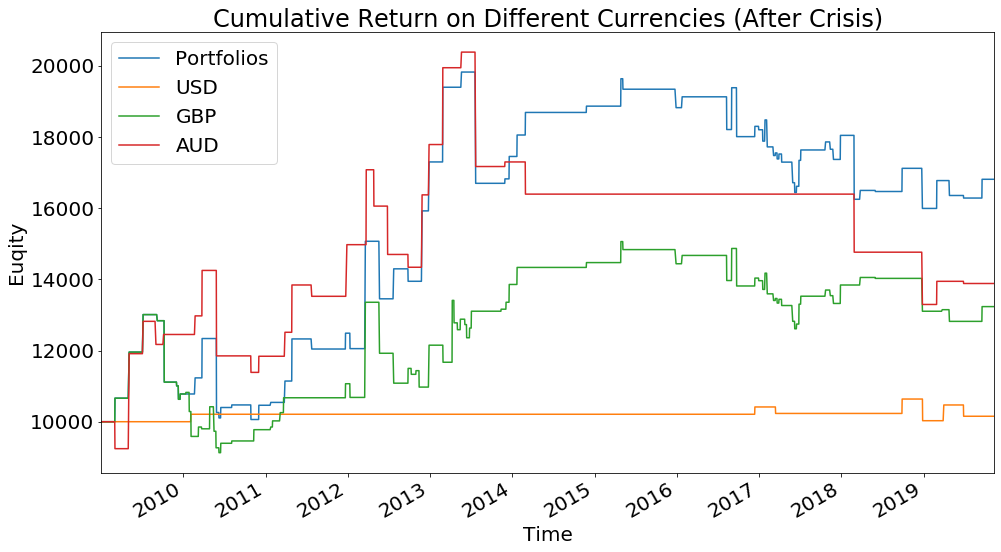

In [51]:
results_09['Equity'].plot(label='Portfolios')
results_usd['Equity'].plot(label='USD')
results_gbp['Equity'].plot(label='GBP')
results_aud['Equity'].plot(label='AUD')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Euqity')
plt.title('Cumulative Return on Different Currencies (After Crisis)')
plt.savefig('Results/Real_Return_4comb_post_crisis.jpg')

### 3.1.2 Realized Return Histogram

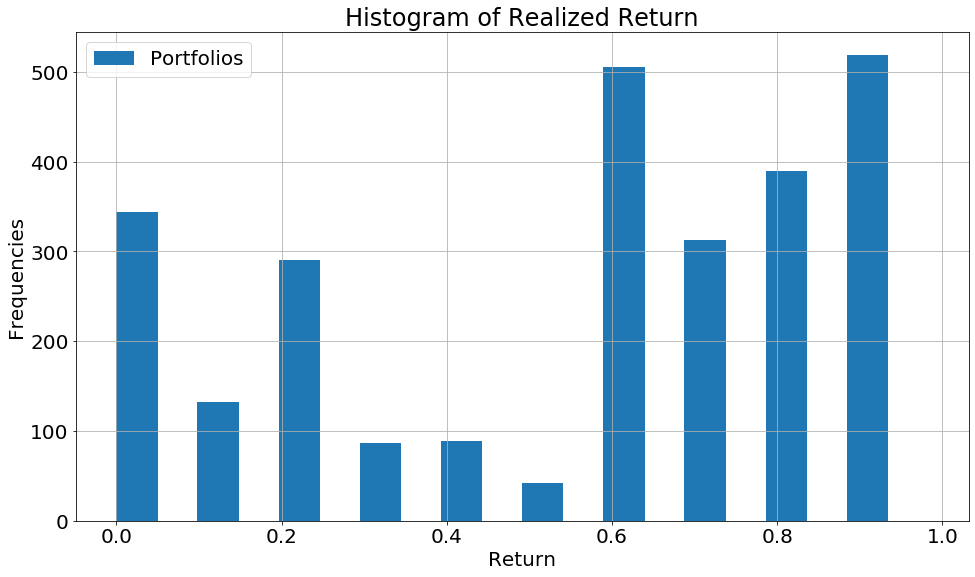

In [23]:
results_09['Real_Return'].hist(width=0.05, label='Portfolios')
plt.legend()
plt.xlabel('Return')
plt.ylabel('Frequencies')
plt.title('Histogram of Realized Return')
plt.savefig('Results/Real_Return_hist_post_crisis.jpg')

### 3.1.3 Unrealized Return Histogram

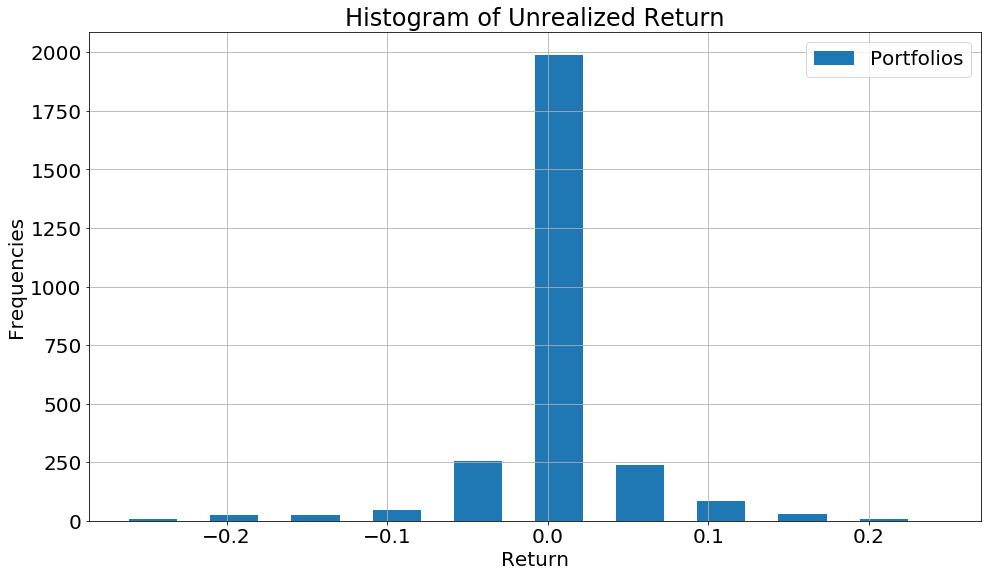

In [24]:
results_09['Unreal_Return'].hist(width=0.03, label='Portfolios')
plt.legend()
plt.xlabel('Return')
plt.ylabel('Frequencies')
plt.title('Histogram of Unrealized Return')
plt.savefig('Results/Unreal_Return_post_crisis.jpg')

### 3.1.4 Value at Risk

* sort return from smallest to largest
* calculate quantile(0.05) = 95%

In [25]:
return_09 = results_09['Unreal_Return'].sort_values()
print('VaR at 90%:', return_09.quantile(0.1))
print('VaR at 95%:', return_09.quantile(0.05))
print('VaR at 99%:', return_09.quantile(0.01))
#return_09

VaR at 90%: -0.017924809982412096
VaR at 95%: -0.04625538554631749
VaR at 99%: -0.1626349052729469


### 3.1.5 Sharpe Ratio and Volatility

mu / sigma

In [26]:
sharpe_09 =  results_09['Unreal_Return'].mean()/results_09['Unreal_Return'].std()
print('Sharpe Ratio each day:', sharpe_09)
print('Sharpe Ratio each year:', sharpe_09 * np.sqrt(251))

Sharpe Ratio each day: 0.15823949102082854
Sharpe Ratio each year: 2.5069850151429405


In [27]:
volatility_09 = results_09['Real_Return'].std()
print('Volatility, after crisis:', volatility_09)

Volatility, after crisis: 0.31550667123808457


## 3.2 Before Crisis vs. After Crisis
time series graph;  sharpe ratio

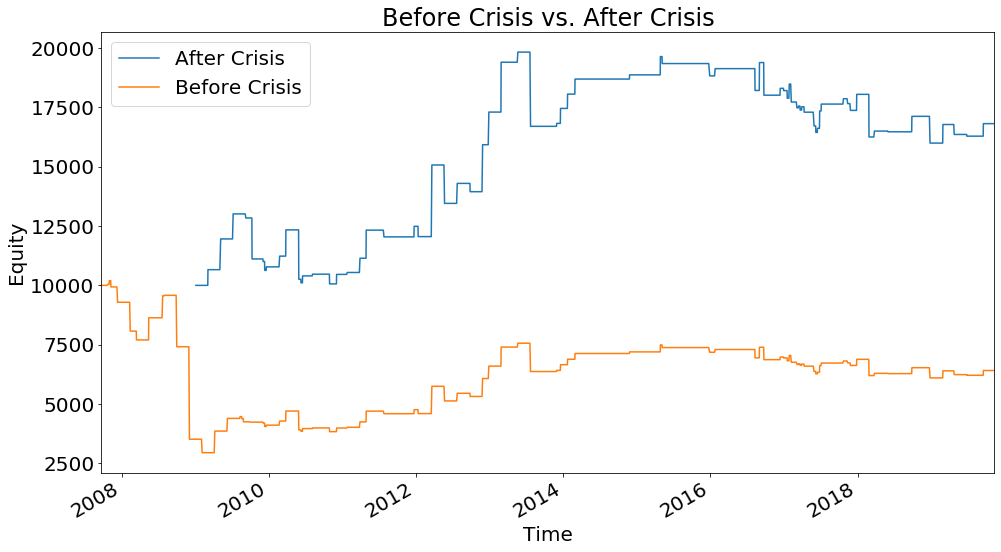

In [28]:
results_09['Equity'].plot(label='After Crisis')
results_07['Equity'].plot(label='Before Crisis')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Before Crisis vs. After Crisis')
plt.savefig('Results/Real_Return_before&post_crisis.jpg')

### 3.2.1 Value at Risk

In [ ]:
return_09 = results_09['Unreal_Return'].sort_values()
print('VaR at 90%, after crisis:', return_09.quantile(0.1))
print('VaR at 95%, after crisis:', return_09.quantile(0.05))
print('VaR at 99%, after crisis:', return_09.quantile(0.01))
#return_09

In [ ]:
return_07 = results_07['Unreal_Return'].sort_values()
print('VaR at 90%, before crisis:', return_07.quantile(0.1))
print('VaR at 95%, before crisis:', return_07.quantile(0.05))
print('VaR at 99%, before crisis:', return_07.quantile(0.01))
#return_09

### 3.2.2 Sharpe Ratio and Volatility

In [29]:
sharpe_07 =  results_07['Unreal_Return'].mean()/results_07['Unreal_Return'].std()
print('Sharpe Ratio each day, before crisis:', sharpe_07)
print('Sharpe Ratio each year, before crisis:', sharpe_07 * np.sqrt(251))

Sharpe Ratio each day, before crisis: 0.011846622873341955
Sharpe Ratio each year, before crisis: 0.18768580353692282


In [30]:
volatility_07 = results_07['Real_Return'].std()
print('Volatility, after crisis:', volatility_09)
print('Volatility, before crisis:', volatility_07)

Volatility, after crisis: 0.31550667123808457
Volatility, before crisis: 0.1516022133265221


## 3.3 Leverage Analysis

### 3.3.1 After Crisis

In [43]:
results_09_l3 = ct.algo_loop(final_data_new.iloc[324:], fx_list, period_list, leverage = 3.0)
results_09_l4 = ct.algo_loop(final_data_new.iloc[324:], fx_list, period_list, leverage = 4.0)
results_09_l5 = ct.algo_loop(final_data_new.iloc[324:], fx_list, period_list, leverage = 5.0)
results_09_l6 = ct.algo_loop(final_data_new.iloc[324:], fx_list, period_list, leverage = 6.0)

2019-11-19 23:40:21:025480: Beginning Carry-Trade Strategy run
2019-11-19 23:40:35:277060: Algo run complete.
2019-11-19 23:40:35:277543: Beginning Carry-Trade Strategy run
2019-11-19 23:40:49:009752: Algo run complete.
2019-11-19 23:40:49:010186: Beginning Carry-Trade Strategy run
2019-11-19 23:41:02:663211: Algo run complete.
2019-11-19 23:41:02:663648: Beginning Carry-Trade Strategy run
2019-11-19 23:41:16:379238: Algo run complete.


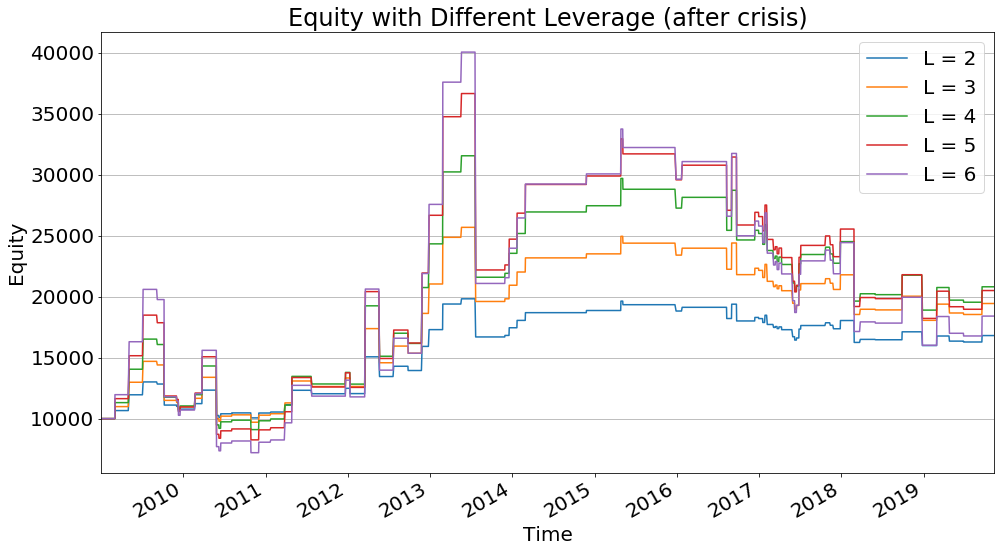

In [44]:
results_09['Equity'].plot(label='L = 2')
results_09_l3['Equity'].plot(label='L = 3')
results_09_l4['Equity'].plot(label='L = 4')
results_09_l5['Equity'].plot(label='L = 5')
results_09_l6['Equity'].plot(label='L = 6')
plt.grid(True, axis='y')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Equity with Different Leverage (after crisis)')
plt.savefig('Results/Real_Return_leverages_post_crisis.jpg')

In [45]:
sharpe_09 =  results_09['Unreal_Return'].mean()/results_09['Unreal_Return'].std()
sharpe_09_l3 =  results_09_l3['Unreal_Return'].mean()/results_09_l3['Unreal_Return'].std()
sharpe_09_l4 =  results_09_l4['Unreal_Return'].mean()/results_09_l4['Unreal_Return'].std()
sharpe_09_l5 =  results_09_l5['Unreal_Return'].mean()/results_09_l5['Unreal_Return'].std()
sharpe_09_l6 =  results_09_l6['Unreal_Return'].mean()/results_09_l6['Unreal_Return'].std()


print('L2, Sharpe Ratio each year:', sharpe_09 * np.sqrt(251))
print('L3, Sharpe Ratio each year:', sharpe_09_l3 * np.sqrt(251))
print('L4, Sharpe Ratio each year:', sharpe_09_l4 * np.sqrt(251))
print('L5, Sharpe Ratio each year:', sharpe_09_l5 * np.sqrt(251))
print('L6, Sharpe Ratio each year:', sharpe_09_l6 * np.sqrt(251))


L2, Sharpe Ratio each year: 2.5069850151429405
L3, Sharpe Ratio each year: 2.4963635317613964
L4, Sharpe Ratio each year: 2.4910487631126403
L5, Sharpe Ratio each year: 2.4878586178373836
L6, Sharpe Ratio each year: 2.485731320338369


### 3.3.2 Before Crisis

In [46]:
results_07_l3 = ct.algo_loop(final_data_new, fx_list, period_list, leverage = 3.0)
results_07_l4 = ct.algo_loop(final_data_new, fx_list, period_list, leverage = 4.0)
results_07_l5 = ct.algo_loop(final_data_new, fx_list, period_list, leverage = 5.0)
results_07_l6 = ct.algo_loop(final_data_new, fx_list, period_list, leverage = 6.0)

2019-11-19 23:41:26:652619: Beginning Carry-Trade Strategy run
2019-11-19 23:41:40:766540: Algo run complete.
2019-11-19 23:41:40:766790: Beginning Carry-Trade Strategy run
2019-11-19 23:41:41:303048: Algo run complete.
2019-11-19 23:41:41:303309: Beginning Carry-Trade Strategy run
2019-11-19 23:41:41:840194: Algo run complete.
2019-11-19 23:41:41:840421: Beginning Carry-Trade Strategy run
2019-11-19 23:41:42:370933: Algo run complete.


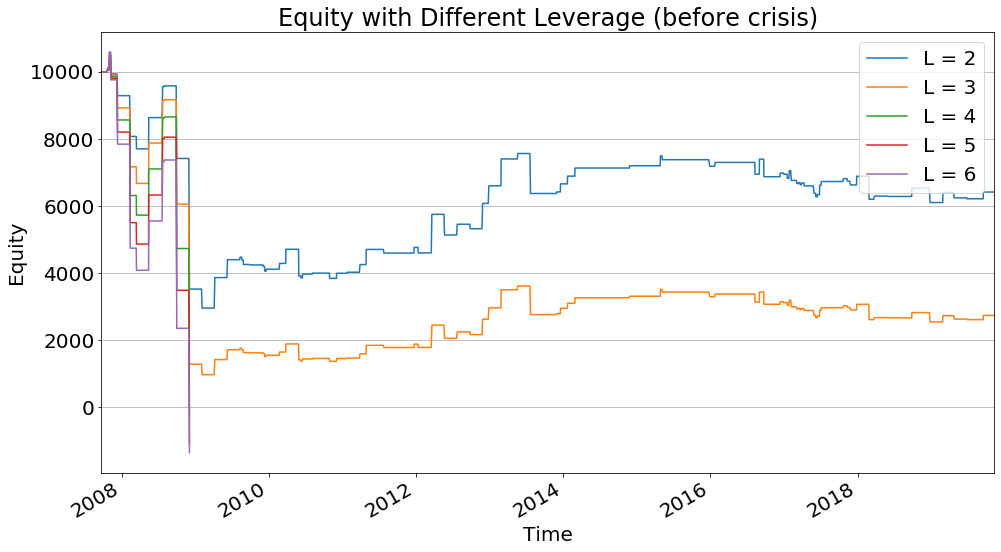

In [47]:
results_07['Equity'].plot(label='L = 2')
results_07_l3['Equity'].plot(label='L = 3')
results_07_l4['Equity'].plot(label='L = 4')
results_07_l5['Equity'].plot(label='L = 5')
results_07_l6['Equity'].plot(label='L = 6')
plt.grid(True, axis='y')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Equity with Different Leverage (before crisis)')
plt.savefig('Results/Real_Return_leverage_before_crisis.jpg')

In [50]:
sharpe_07 =  results_07['Unreal_Return'].mean()/results_07['Unreal_Return'].std()
sharpe_07_l3 =  results_07_l3['Unreal_Return'].mean()/results_07_l3['Unreal_Return'].std()
sharpe_07_l4 =  results_07_l4['Unreal_Return'].mean()/results_07_l4['Unreal_Return'].std()
sharpe_07_l5 =  results_07_l5['Unreal_Return'].mean()/results_07_l5['Unreal_Return'].std()
sharpe_07_l6 =  results_07_l6['Unreal_Return'].mean()/results_07_l6['Unreal_Return'].std()


print('L2, Sharpe Ratio each year:', sharpe_07 * np.sqrt(251))
print('L3, Sharpe Ratio each year:', sharpe_07_l3 * np.sqrt(251))
print('L4, Sharpe Ratio each year:', sharpe_07_l4 * np.sqrt(251))
print('L5, Sharpe Ratio each year:', sharpe_07_l5 * np.sqrt(251))
print('L6, Sharpe Ratio each year:', sharpe_07_l6 * np.sqrt(251))

L2, Sharpe Ratio each year: 0.18768580353692282
L3, Sharpe Ratio each year: 0.17116406192954942
L4, Sharpe Ratio each year: -5.840165927156961
L5, Sharpe Ratio each year: -5.852224515308024
L6, Sharpe Ratio each year: -5.860262097416548
